In [44]:
import networkx as nx
import matplotlib.pyplot as plt

In [165]:
# read the Levis data pair and nodes
import pandas as pd
levis_data = pd.read_excel(r"C:\Users\Lefteris\Desktop\Levis\Levis_Trends_People_2.xlsx")

levis_data.head()

Retargeting Function ID Retargeting Function ID.1  Device ID Counter
0           Diesel London             Diesel London               4361
1           Diesel London            Topshop London               1099
2           Diesel London              Levis London                688
3           Diesel London               Zara London                520
4           Diesel London            Primark London                185

In [223]:
# get the unique values from the dataframe
unique_array = (levis_data["Retargeting Function ID"]).unique()
unique_list = unique_array.tolist()

# make a list with all the pairs
pair_list= []
for i in range(len(levis_data)):
    pair_list.append((levis_data.iloc[i][0],levis_data.iloc[i][1]))
    
# make a list with all the weighted pairs
weight_list= []
for i in range(len(levis_data)):
    weight_list.append((levis_data.iloc[i][0],levis_data.iloc[i][1],levis_data.iloc[i][2]))

In [236]:
# create an instance of a graph
G = nx.Graph()

# add nodes and edges from lists
G.add_nodes_from(unique_list)

In [269]:
# add weights
for i in weight_list:
    G.add_edge(i[0],i[1], weight=i[2])

In [270]:
unique_list

['Diesel London',
 'Diesel Non-London',
 'Levis London',
 'Levis Non-London',
 'Primark London',
 'Primark Non-London',
 'Topshop London',
 'Topshop Non-London',
 'Zara London',
 'Zara Non-London']

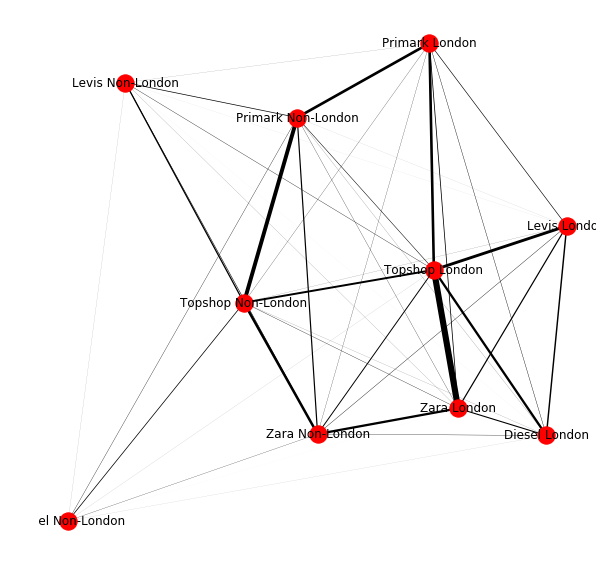

In [282]:
# use one of the edge properties to control line thickness
edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
edgewidth_norm= [(float(i)/sum(edgewidth))*500 for i in edgewidth]

# layout
pos = nx.spring_layout(G, iterations=50)
#pos = nx.random_layout(G)

# rendering
plt.figure(figsize=(10,10))
plt.subplot(); plt.axis('off')
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, width=edgewidth_norm)

# add labels from the unique_list
labels = {}
for i in unique_list:
    labels[i] = i
nx.draw_networkx_labels(G,pos, labels)

plt.show()

In [105]:
# stats about nodes and edges
print("number of nodes: {}".format(G.number_of_nodes()))
print("number of edges: {}".format(G.number_of_edges()))

number of nodes: 10
number of edges: 55


In [335]:
import plotly.plotly as py
import plotly.graph_objs as go

%pylab inline

# https://plot.ly/~empet/14683/networks-with-plotly/#/

Populating the interactive namespace from numpy and matplotlib
